# ERCOT Solar Energy Analysis and Machine Learning

### Preprocessing: Transform and Load Data

##### **{Solar Energy Generation Data}**

In [54]:
import pandas as pd
#
energy_df =pd.read_csv('/Users/tovi/Documents/texas-renewables-analysis/clean_data/ercot_historical_solar_generation_data.csv')
energy_df.head()

,timestamp,solar_system,solar_centerwest,solar_northwest,solar_farwest,solar_fareast,solar_southeast,solar_centereast
0,2022-06-29 01:00:00,0.20,0.0,0.0,0.0,0.1,0.0,0.10
1,2022-06-29 02:00:00,0.19,0.0,0.0,0.0,0.1,0.0,0.09
2,2022-06-29 03:00:00,0.10,0.0,0.0,0.0,0.1,0.0,0.00
3,2022-06-29 04:00:00,0.10,0.0,0.0,0.0,0.1,0.0,0.00
4,2022-06-29 05:00:00,0.10,0.0,0.0,0.0,0.1,0.0,0.00


In [55]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12743 entries, 0 to 12742
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         12743 non-null  object 
 1   solar_system      12739 non-null  float64
 2   solar_centerwest  12739 non-null  float64
 3   solar_northwest   12739 non-null  float64
 4   solar_farwest     12739 non-null  float64
 5   solar_fareast     12739 non-null  float64
 6   solar_southeast   12739 non-null  float64
 7   solar_centereast  12739 non-null  float64
dtypes: float64(7), object(1)
memory usage: 796.6+ KB


In [56]:
energy_df.describe()

,solar_system,solar_centerwest,solar_northwest,solar_farwest,solar_fareast,solar_southeast,solar_centereast
count,12739.000000,12739.000000,12739.000000,12739.000000,12739.000000,12739.000000,12739.000000
mean,3441.211389,628.069239,119.806256,1216.796427,932.071108,225.620721,318.847640
std,4310.458397,814.274688,167.970070,1544.694694,1249.438518,292.576063,437.889514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.260000,0.000000,0.000000,0.010000,0.170000,0.000000,0.020000
50%,237.300000,24.070000,3.420000,61.650000,33.060000,8.330000,11.770000
75%,7333.030000,1378.290000,254.245000,2748.620000,1865.445000,484.840000,557.695000
max,17893.340000,3581.420000,827.200000,4426.930000,5611.480000,1654.630000,2379.260000


##### **{Hourly Temperature Data}**

In [57]:
temp_df = pd.read_csv('/Users/tovi/Documents/texas-renewables-analysis/clean_data/era5_wind_conditions_data.csv')
temp_df.head()

,time,number,temp_2m_south,wind_u_100m_south,wind_v_100m_south,number.1,temp_2m_north,wind_u_100m_north,wind_v_100m_north,number.2,temp_2m_east,wind_u_100m_east,wind_v_100m_east,number.3,temp_2m_west,wind_u_100m_west,wind_v_100m_west
0,2021-01-01 00:00:00,0,280.44113,8.874052,-4.125525,0,275.47700,-0.758140,-8.064275,0,285.33070,8.095841,5.828926,0,274.88324,3.239945,-4.025888
1,2021-01-01 01:00:00,0,280.06485,8.833785,-4.142875,0,275.49615,-0.381892,-7.454720,0,284.06274,9.073054,5.087430,0,274.58267,3.051376,-3.864054
2,2021-01-01 02:00:00,0,279.50992,8.720156,-3.938205,0,275.44696,0.146601,-6.802784,0,282.77908,8.665540,4.598661,0,273.86377,2.987516,-3.852034
3,2021-01-01 03:00:00,0,278.65192,8.357309,-3.723078,0,275.24594,0.887693,-6.319172,0,281.25110,7.918151,4.829106,0,273.21588,2.977859,-3.923165
4,2021-01-01 04:00:00,0,278.41907,8.048112,-3.574828,0,275.12744,1.753668,-5.496035,0,280.96722,8.195437,5.092289,0,272.90448,3.114550,-3.790921


In [58]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               26280 non-null  object 
 1   number             26280 non-null  int64  
 2   temp_2m_south      26280 non-null  float64
 3   wind_u_100m_south  26280 non-null  float64
 4   wind_v_100m_south  26280 non-null  float64
 5   number.1           26280 non-null  int64  
 6   temp_2m_north      26280 non-null  float64
 7   wind_u_100m_north  26280 non-null  float64
 8   wind_v_100m_north  26280 non-null  float64
 9   number.2           26280 non-null  int64  
 10  temp_2m_east       26280 non-null  float64
 11  wind_u_100m_east   26280 non-null  float64
 12  wind_v_100m_east   26280 non-null  float64
 13  number.3           26280 non-null  int64  
 14  temp_2m_west       26280 non-null  float64
 15  wind_u_100m_west   26280 non-null  float64
 16  wind_v_100m_west   262

In [59]:
temp_df.describe()

,number,temp_2m_south,wind_u_100m_south,wind_v_100m_south,number.1,temp_2m_north,wind_u_100m_north,wind_v_100m_north,number.2,temp_2m_east,wind_u_100m_east,wind_v_100m_east,number.3,temp_2m_west,wind_u_100m_west,wind_v_100m_west
count,26280.0,26280.000000,26280.000000,26280.000000,26280.0,26280.000000,26280.000000,26280.000000,26280.0,26280.000000,26280.000000,26280.000000,26280.0,26280.000000,26280.000000,26280.000000
mean,0.0,295.679664,-2.109953,2.173721,0.0,292.678974,-0.299001,2.246374,0.0,294.631132,-0.841990,1.669388,0.0,292.518427,-0.370053,2.204765
std,0.0,7.877425,2.338760,4.299740,0.0,10.129044,2.915414,5.036877,0.0,7.734087,2.863451,4.636936,0.0,9.705829,3.351205,3.734443
min,0.0,264.869140,-9.295389,-13.509977,0.0,256.117000,-8.076406,-14.575628,0.0,262.965730,-12.233512,-13.594587,0.0,258.484900,-10.449115,-12.672094
25%,0.0,290.501768,-3.742505,-0.277738,0.0,285.552590,-2.368521,-1.214056,0.0,289.654238,-2.805618,-1.454300,0.0,285.467175,-2.789593,-0.064723
50%,0.0,296.874910,-2.251874,2.963160,0.0,293.721800,-0.530872,2.807790,0.0,295.956560,-0.949976,2.313971,0.0,293.457885,-0.773695,2.756597
75%,0.0,301.262848,-0.739637,5.361281,0.0,300.208215,1.532718,6.036946,0.0,300.218872,0.990808,5.184723,0.0,299.840105,1.609088,4.875922
max,0.0,312.407530,9.091810,12.066953,0.0,315.514160,12.187036,15.145892,0.0,313.501130,13.093611,14.176582,0.0,314.362730,13.988998,13.009392


##### **{Hourly Load By Region Data}**

In [60]:
load_df = pd.read_csv('/Users/tovi/Documents/texas-renewables-analysis/clean_data/ercot_grid_load_data.csv')
load_df.head()

,timestamp,coast,east,farwest,north,northcentral,south,southcentral,west,system
0,2021-01-01 00:00:00,"11,047.02","1,517.44","3,978.22",838.35,"13,575.28","3,545.09","7,778.26","1,440.19","43,719.85"
1,2021-01-01 01:00:00,"10,954.47","1,523.68","3,975.76",825.12,"13,340.34","3,586.55","7,693.74","1,421.39","43,321.05"
2,2021-01-01 02:00:00,"10,883.66","1,519.80","3,969.81",819.55,"13,311.63","3,586.12","7,566.95","1,405.54","43,063.07"
3,2021-01-01 03:00:00,"10,926.48","1,523.47","3,983.49",820.61,"13,356.44","3,570.59","7,506.69","1,402.28","43,090.06"
4,2021-01-01 04:00:00,"11,019.80","1,565.63","3,980.94",831.61,"13,528.65","3,590.90","7,563.97","1,405.09","43,486.59"


In [61]:
load_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   timestamp     26280 non-null  object
 1   coast         26280 non-null  object
 2   east          26280 non-null  object
 3   farwest       26280 non-null  object
 4   north         26280 non-null  object
 5   northcentral  26280 non-null  object
 6   south         26280 non-null  object
 7   southcentral  26280 non-null  object
 8   west          26280 non-null  object
 9   system        26280 non-null  object
dtypes: object(10)
memory usage: 2.0+ MB


In [62]:
load_df.describe()

,timestamp,coast,east,farwest,north,northcentral,south,southcentral,west,system
count,26280,26280,26280,26280,26280,26280,26280,26280,26280,26280
unique,26277,25905,23716,25014,22870,25964,25197,25743,22210,26168
top,2021-11-07 01:00:00,"11,892.45","1,557.84","4,235.17",994.07,"12,257.86","3,536.00","7,455.25","1,098.02","37,286.27"
freq,2,3,4,4,5,3,4,3,6,2


### Step 2: Data Cleaning

##### **{Hourly Solar Energy Generation Data}**

In [63]:
# checking for dupicates and null values
print (f'Number of duplicates: {energy_df.duplicated().sum()}')
print (f'Number of null values: {energy_df.isnull().sum()}')

Number of duplicates: 120
Number of null values: timestamp           0
solar_system        4
solar_centerwest    4
solar_northwest     4
solar_farwest       4
solar_fareast       4
solar_southeast     4
solar_centereast    4
dtype: int64


In [64]:
# dropping duplicate and null values
energy_df = energy_df.dropna()
energy_df = energy_df.drop_duplicates()

In [65]:
# changing timestamp column to datetime format
energy_df['timestamp'] = pd.to_datetime(energy_df['timestamp'])

In [66]:
# saving new csv file
energy_df.to_csv('/Users/tovi/Documents/solar_data_converted.csv', index=False)

##### **{Hourly Temperature Data}**

In [67]:
# checking for dupicates and null values
print (f'Number of duplicates: {temp_df.duplicated().sum()}')
print (f'Number of null values: {temp_df.isnull().sum()}')

Number of duplicates: 0
Number of null values: time                 0
number               0
temp_2m_south        0
wind_u_100m_south    0
wind_v_100m_south    0
number.1             0
temp_2m_north        0
wind_u_100m_north    0
wind_v_100m_north    0
number.2             0
temp_2m_east         0
wind_u_100m_east     0
wind_v_100m_east     0
number.3             0
temp_2m_west         0
wind_u_100m_west     0
wind_v_100m_west     0
dtype: int64


In [68]:
# changing time column to datetime format
temp_df['time'] = pd.to_datetime(temp_df['time'])

In [69]:
# keeping only time and temperature columns
columns_to_drop = ['number', 'wind_u_100m_south', 'wind_v_100m_south', 'number.1', 'wind_u_100m_north', 'wind_v_100m_north', 'number.2', 'wind_u_100m_east', 'wind_v_100m_east', 'number.3', 'wind_u_100m_west', 'wind_v_100m_west']
temp_df_dropped = temp_df.drop(columns=columns_to_drop, axis=1)
temp_df_dropped.head()

,time,temp_2m_south,temp_2m_north,temp_2m_east,temp_2m_west
0,2021-01-01 00:00:00,280.44113,275.47700,285.33070,274.88324
1,2021-01-01 01:00:00,280.06485,275.49615,284.06274,274.58267
2,2021-01-01 02:00:00,279.50992,275.44696,282.77908,273.86377
3,2021-01-01 03:00:00,278.65192,275.24594,281.25110,273.21588
4,2021-01-01 04:00:00,278.41907,275.12744,280.96722,272.90448


In [70]:
# list temperature columns to convert
temp_columns = ['temp_2m_south', 'temp_2m_north', 'temp_2m_east', 'temp_2m_west']

# convert from kelvin to celsius
temp_df_dropped[temp_columns] = temp_df_dropped[temp_columns] - 273.15

# converting from celcius to fahrenheit
temp_df_dropped[temp_columns] = (temp_df_dropped[temp_columns] * 9/5) + 32
temp_df_dropped.head()

,time,temp_2m_south,temp_2m_north,temp_2m_east,temp_2m_west
0,2021-01-01 00:00:00,45.124034,36.188600,53.925260,35.119832
1,2021-01-01 01:00:00,44.446730,36.223070,51.642932,34.578806
2,2021-01-01 02:00:00,43.447856,36.134528,49.332344,33.284786
3,2021-01-01 03:00:00,41.903456,35.772692,46.581980,32.118584
4,2021-01-01 04:00:00,41.484326,35.559392,46.070996,31.558064


In [71]:
# saving new csv file
temp_df_dropped.to_csv('/Users/tovi/Documents/temp_data_converted.csv', index=False)

##### **{Hourly Load By Region Data}**

In [72]:
# checking for dupicates and null values
print (f'Number of duplicates: {load_df.duplicated().sum()}')
print (f'Number of null values: {load_df.isnull().sum()}')

Number of duplicates: 0
Number of null values: timestamp       0
coast           0
east            0
farwest         0
north           0
northcentral    0
south           0
southcentral    0
west            0
system          0
dtype: int64


In [73]:
# changing timestamp column to datetime format
load_df['timestamp'] = pd.to_datetime(load_df['timestamp'])

In [74]:
#dropping commas for data consistency
load_df = load_df.replace({',' : ''}, regex=True)

In [75]:
# saving new csv file
load_df.to_csv('/Users/tovi/Documents/load_data_converted.csv', index=False)

### Step 3: Joining Files using SQL

The first step is to create tables that will properly hold our converted data and upload the individual CSV files. Below is SQL documentaion for how the tables were created and eventually joined to produce a single file containing all relevant values to be used for analysis.

In [76]:
"""
CREATE TABLE solar_generation_data (timestamp TIMESTAMP NOT NULL,
									solar_system DECIMAL,
									solar_centerwest DECIMAL,
									solar_northwest DECIMAL,
									solar_farwest DECIMAL,
									solar_fareast DECIMAL,
									solar_southeast DECIMAL,
									solar_centereast DECIMAL
									);
"""

'\nCREATE TABLE solar_generation_data (timestamp TIMESTAMP NOT NULL,\n\t\t\t\t\t\t\t\t\tsolar_system DECIMAL,\n\t\t\t\t\t\t\t\t\tsolar_centerwest DECIMAL,\n\t\t\t\t\t\t\t\t\tsolar_northwest DECIMAL,\n\t\t\t\t\t\t\t\t\tsolar_farwest DECIMAL,\n\t\t\t\t\t\t\t\t\tsolar_fareast DECIMAL,\n\t\t\t\t\t\t\t\t\tsolar_southeast DECIMAL,\n\t\t\t\t\t\t\t\t\tsolar_centereast DECIMAL\n\t\t\t\t\t\t\t\t\t);\n'

In [77]:
"""
CREATE TABLE solar_temp_data (time TIMESTAMP NOT NULL,
							  temp_2m_south DECIMAL(5,2),
							  temp_2m_north DECIMAL (5,2),
							  temp_2m_east DECIMAL (5,2),
							  temp_2m_west DECIMAL (5,2)
							  );
"""

'\nCREATE TABLE solar_temp_data (time TIMESTAMP NOT NULL,\n\t\t\t\t\t\t\t  temp_2m_south DECIMAL(5,2),\n\t\t\t\t\t\t\t  temp_2m_north DECIMAL (5,2),\n\t\t\t\t\t\t\t  temp_2m_east DECIMAL (5,2),\n\t\t\t\t\t\t\t  temp_2m_west DECIMAL (5,2)\n\t\t\t\t\t\t\t  );\n'

In [78]:
"""
CREATE TABLE load_data (timestamp TIMESTAMP NOT NULL,
						coast_load DECIMAL(10,2),
						east_load DECIMAL(10,2),
						farwest_load DECIMAL(10,2),
						north_load DECIMAL(10,2),
						northcentral_load DECIMAL(10,2),
						south_load DECIMAL(10,2),
						southcentral_load DECIMAL(10,2),
						west_load DECIMAL(10,2),
						system_load DECIMAL(10,2)
						);
"""

'\nCREATE TABLE load_data (timestamp TIMESTAMP NOT NULL,\n\t\t\t\t\t\tcoast_load DECIMAL(10,2),\n\t\t\t\t\t\teast_load DECIMAL(10,2),\n\t\t\t\t\t\tfarwest_load DECIMAL(10,2),\n\t\t\t\t\t\tnorth_load DECIMAL(10,2),\n\t\t\t\t\t\tnorthcentral_load DECIMAL(10,2),\n\t\t\t\t\t\tsouth_load DECIMAL(10,2),\n\t\t\t\t\t\tsouthcentral_load DECIMAL(10,2),\n\t\t\t\t\t\twest_load DECIMAL(10,2),\n\t\t\t\t\t\tsystem_load DECIMAL(10,2)\n\t\t\t\t\t\t);\n'

After these tables were created, the converted solar energy, temperature, and hourly load files were uploaded into thier corresponding table via PGAdmin.

In [79]:
"""
SELECT solar_generation_data.timestamp, temp_2m_south, temp_2m_north, temp_2m_east, temp_2m_west, solar_system, solar_centerwest, solar_northwest, solar_farwest, solar_fareast, solar_southeast, solar_centereast, coast_load, east_load, farwest_load, north_load, northcentral_load, south_load, southcentral_load, west_load, system_load
FROM solar_generation_data
LEFT JOIN solar_temp_data
ON solar_generation_data.timestamp = solar_temp_data.time
LEFT JOIN load_data
ON solar_generation_data.timestamp = load_data.timestamp
ORDER BY solar_generation_data.timestamp;
"""

'\nSELECT solar_generation_data.timestamp, temp_2m_south, temp_2m_north, temp_2m_east, temp_2m_west, solar_system, solar_centerwest, solar_northwest, solar_farwest, solar_fareast, solar_southeast, solar_centereast, coast_load, east_load, farwest_load, north_load, northcentral_load, south_load, southcentral_load, west_load, system_load\nFROM solar_generation_data\nLEFT JOIN solar_temp_data\nON solar_generation_data.timestamp = solar_temp_data.time\nLEFT JOIN load_data\nON solar_generation_data.timestamp = load_data.timestamp\nORDER BY solar_generation_data.timestamp;\n'

This join returns all records in the solar_generation_data alongside the corresponding temperature and load values for each timestamp from the temperature and load tables. The resulting table was saved as a csv file under solar_data_combined.csv.

## **EDA:**

In [80]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# solar_data_combined.csv had quotes around all entries after exporting from PGAdmin, so I removed them and saved the file:
sdf = pd.read_csv('/Users/tovi/Downloads/solar_data_combined.csv', quotechar="'")
sdf.to_csv('/Users/tovi/Downloads/solar_data_complete.csv', index=False)

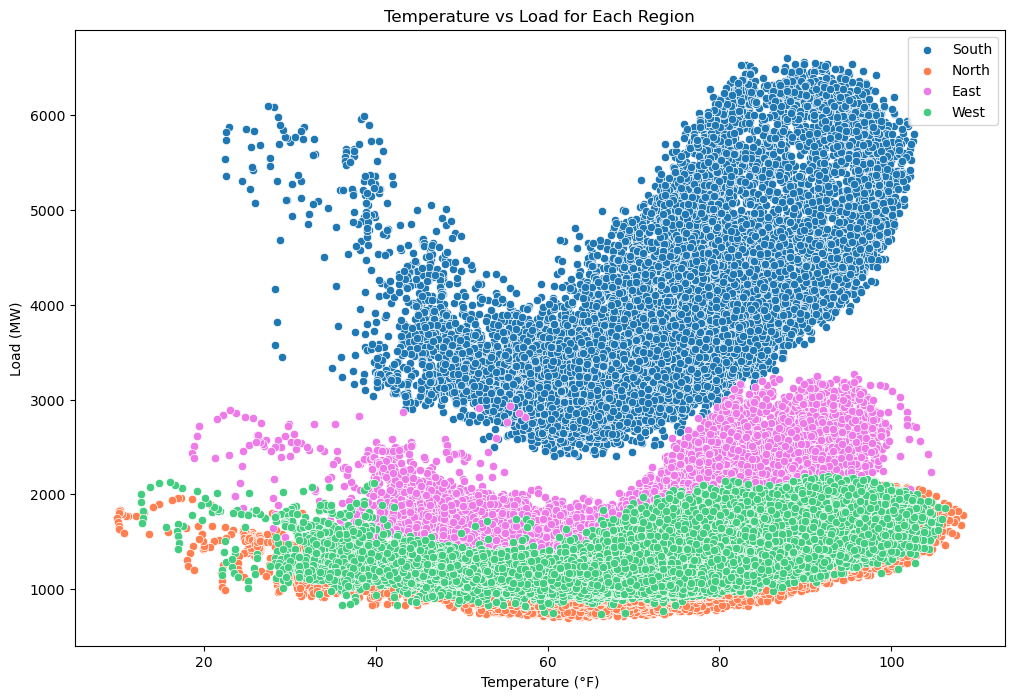

In [81]:
# load data
sdf = pd.read_csv('/Users/tovi/Downloads/solar_data_complete.csv')

# make copy of data to be used specifically for EDA (avoid modifying the original data)
sdf_copy = sdf.copy()

# plotting comparing temperature vs load for each region
plt.figure(figsize=(12, 8))

# Scatter plots for each region
sns.scatterplot(data=sdf_copy, x='temp_2m_south', y='south_load', label='South', color='#1f77b4')
sns.scatterplot(data=sdf_copy, x='temp_2m_north', y='north_load', label='North', color='coral')
sns.scatterplot(data=sdf_copy, x='temp_2m_east', y='east_load', label='East', color='#ee7ae9')
sns.scatterplot(data=sdf_copy, x='temp_2m_west', y='west_load', label='West', color='#43cd80')

plt.title('Temperature vs Load for Each Region')
plt.xlabel('Temperature (°F)')
plt.ylabel('Load (MW)')
plt.legend()

plt.savefig('images/temp_vs_load.png', format='png', dpi=300)
plt.show()

This scatterplot makes it easy to compare temperature vs. load demand across regions. All regions share a similar shape , with the southern region having many load demand values clustered at higher temperatures. This is to be expected, as in the south temperatures are typically higher, for longer periods, and cooling systems are typically used more frequently.

In [82]:
# calculate the average solar generation for the 'west' region using data from northwest, far west, and center west
sdf_copy['solar_west'] = sdf_copy[['solar_northwest', 'solar_farwest', 'solar_centerwest']].mean(axis=1)

# assign solar generation from the southeast as the representative for the 'south' region
sdf_copy['solar_south'] = sdf_copy['solar_southeast']

# calculate the average solar generation for the 'north' region using data from center east and center west
sdf_copy['solar_north'] = sdf_copy[['solar_centereast', 'solar_centerwest']].mean(axis=1)

# assign solar generation from the far east as the representative for the 'east' region
sdf_copy['solar_east'] = sdf_copy['solar_fareast']

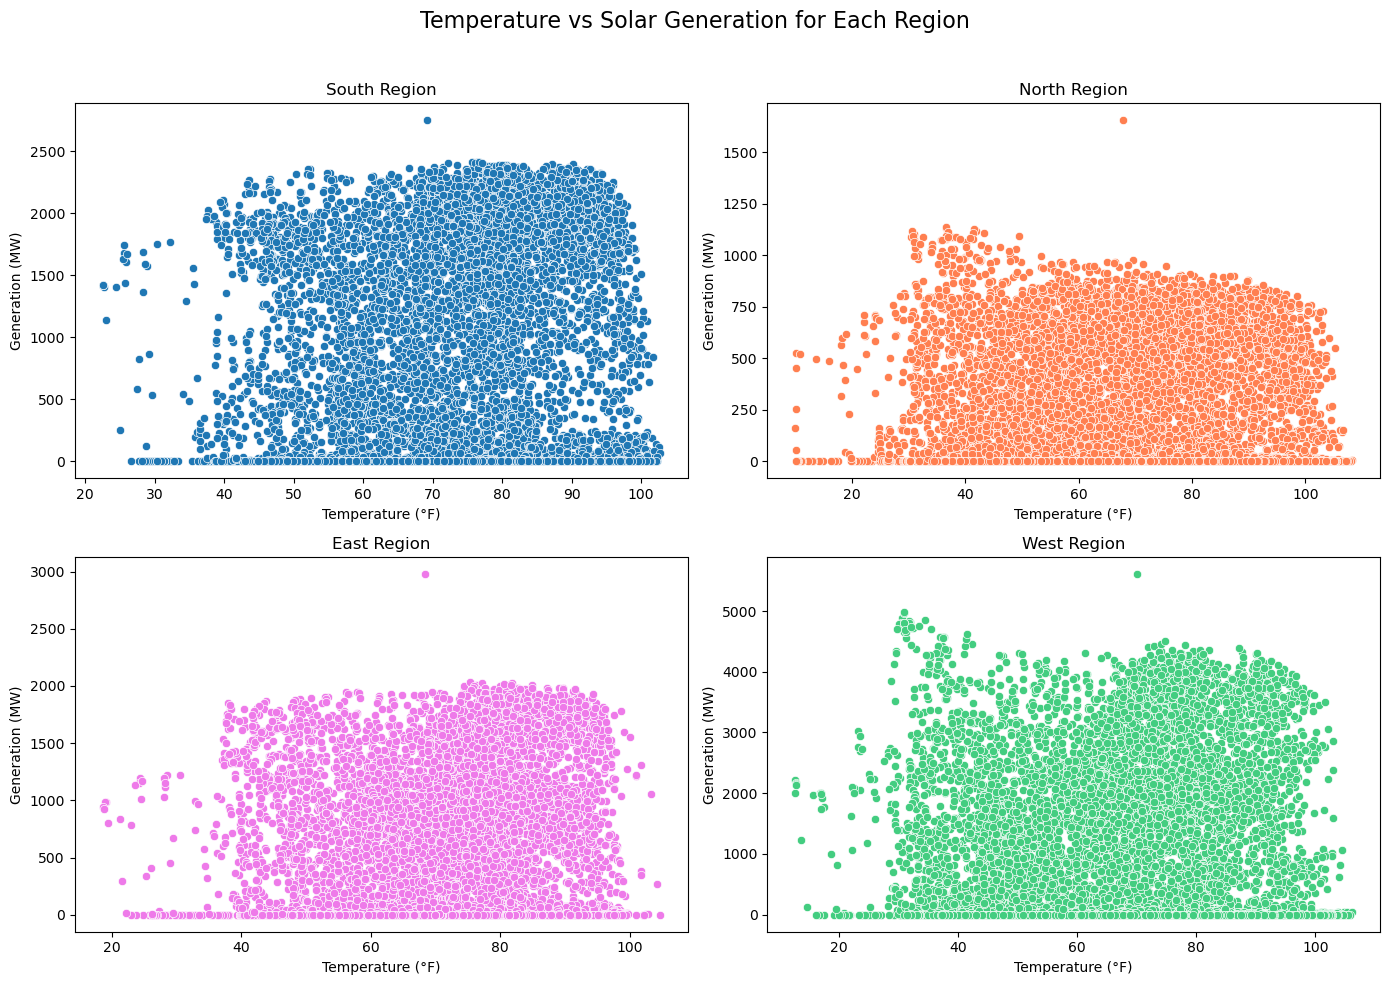

In [83]:
# create a figure with a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # figsize defines the width and height of the entire figure
fig.suptitle('Temperature vs Solar Generation for Each Region', fontsize=16)  # Add a main title to the figure

# south region Plot
sns.scatterplot(data=sdf_copy, x='temp_2m_south', y='solar_west', ax=axes[0, 0], color='#1f77b4') 
axes[0, 0].set_title('South Region')  # Title for this subplot
axes[0, 0].set_xlabel('Temperature (°F)')  # X-axis label
axes[0, 0].set_ylabel('Generation (MW)')  # Y-axis label

# north region Plot
sns.scatterplot(data=sdf_copy, x='temp_2m_north', y='solar_south', ax=axes[0, 1], color='coral')
axes[0, 1].set_title('North Region')
axes[0, 1].set_xlabel('Temperature (°F)')
axes[0, 1].set_ylabel('Generation (MW)')

# east region Plot
sns.scatterplot(data=sdf_copy, x='temp_2m_east', y='solar_north', ax=axes[1, 0], color='#ee7ae9')
axes[1, 0].set_title('East Region')
axes[1, 0].set_xlabel('Temperature (°F)')
axes[1, 0].set_ylabel('Generation (MW)')

# west region Plot
sns.scatterplot(data=sdf_copy, x='temp_2m_west', y='solar_east', ax=axes[1, 1], color='#43cd80')
axes[1, 1].set_title('West Region')
axes[1, 1].set_xlabel('Temperature (°F)')
axes[1, 1].set_ylabel('Generation (MW)')

# automatically adjust subplot params
plt.tight_layout(rect=[0, 0, 1, 0.96])  # leaves space at the top for the title

plt.savefig('images/regional_temp_vs_generation.png', format='png', dpi=300)
plt.show()


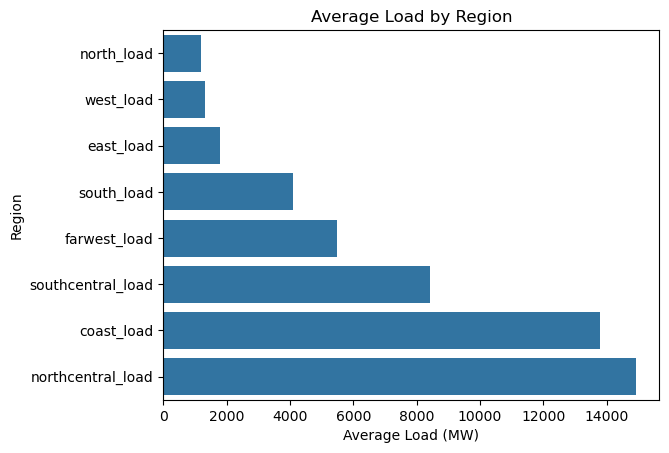

In [84]:
# define a list of columns that represent the load for each region
load_cols = ['coast_load', 'east_load', 'farwest_load', 'north_load',
             'northcentral_load', 'south_load', 'southcentral_load', 'west_load']

# calculate the mean (average) load for each region and sort them in ascending order
mean_loads = sdf_copy[load_cols].mean().sort_values()

# create a horizontal bar plot showing the average load for each region
sns.barplot(x=mean_loads.values, y=mean_loads.index)  # x=mean values, y=region names
plt.title('Average Load by Region')
plt.xlabel('Average Load (MW)')
plt.ylabel('Region')

plt.savefig('images/regional_avg_load.png', format='png', dpi=300)
plt.show()

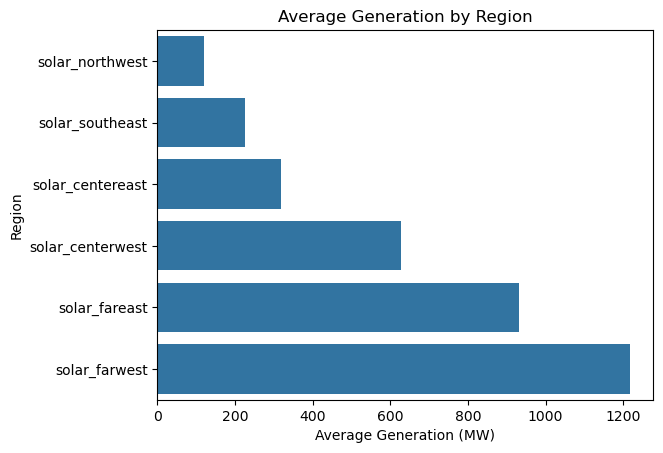

In [85]:
# define a list of columns that represent the load for each region
generation_cols = ['solar_centerwest', 'solar_northwest','solar_farwest', 
             'solar_fareast', 'solar_southeast', 'solar_centereast',]

# calculate the mean (average) load for each region and sort them in ascending order
mean_loads = sdf_copy[generation_cols].mean().sort_values()

# create a horizontal bar plot showing the average load for each region
sns.barplot(x=mean_loads.values, y=mean_loads.index)  # x=mean values, y=region names

# add a title to the plot
plt.title('Average Generation by Region')
plt.xlabel('Average Generation (MW)')
plt.ylabel('Region')

plt.savefig('images/regional_avg_generation.png', format='png', dpi=300)
plt.show()

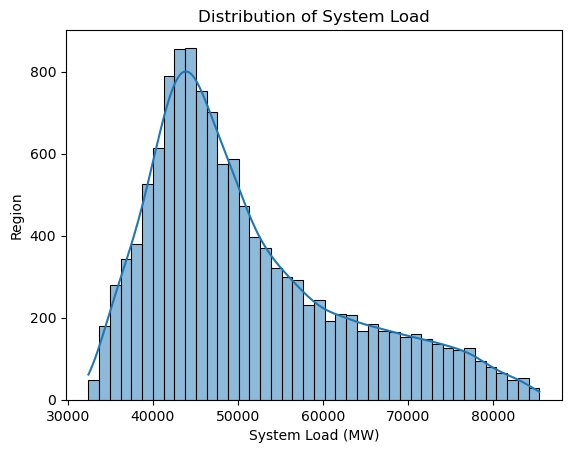

In [86]:
# histogram of the 'system_load' column with a KDE (density) curve
sns.histplot(data=sdf_copy, x='system_load', kde=True)

plt.title('Distribution of System Load')
plt.xlabel('System Load (MW)')
plt.ylabel('Region')

plt.savefig('images/sys_load_dist.png', format='png', dpi=300)
plt.show()

## **Machine Learning:**

In [87]:
# load and inspect data
print(sdf.shape)
print(sdf.columns)
print(sdf.dtypes)
sdf.head()


(12745, 21)
Index(['timestamp', 'temp_2m_south', 'temp_2m_north', 'temp_2m_east',
       'temp_2m_west', 'solar_system', 'solar_centerwest', 'solar_northwest',
       'solar_farwest', 'solar_fareast', 'solar_southeast', 'solar_centereast',
       'coast_load', 'east_load', 'farwest_load', 'north_load',
       'northcentral_load', 'south_load', 'southcentral_load', 'west_load',
       'system_load'],
      dtype='object')
timestamp             object
temp_2m_south        float64
temp_2m_north        float64
temp_2m_east         float64
temp_2m_west         float64
solar_system         float64
solar_centerwest     float64
solar_northwest      float64
solar_farwest        float64
solar_fareast        float64
solar_southeast      float64
solar_centereast     float64
coast_load           float64
east_load            float64
farwest_load         float64
north_load           float64
northcentral_load    float64
south_load           float64
southcentral_load    float64
west_load            flo

,timestamp,temp_2m_south,temp_2m_north,temp_2m_east,temp_2m_west,solar_system,solar_centerwest,solar_northwest,solar_farwest,solar_fareast,...,solar_centereast,coast_load,east_load,farwest_load,north_load,northcentral_load,south_load,southcentral_load,west_load,system_load
0,2022-06-29 01:00:00,85.11,86.26,87.33,85.23,0.20,0.0,0.0,0.0,0.1,...,0.10,13275.19,1519.27,4295.79,945.65,12947.00,3504.90,6645.97,1116.23,44249.99
1,2022-06-29 02:00:00,83.93,83.60,85.38,83.43,0.19,0.0,0.0,0.0,0.1,...,0.09,12819.07,1445.39,4272.60,905.64,12280.40,3369.22,6346.96,1076.51,42515.80
2,2022-06-29 03:00:00,79.99,79.54,83.44,78.31,0.10,0.0,0.0,0.0,0.1,...,0.00,12558.05,1385.83,4264.49,877.19,11810.40,3250.56,6192.21,1062.15,41400.88
3,2022-06-29 04:00:00,78.57,77.75,82.08,75.17,0.10,0.0,0.0,0.0,0.1,...,0.00,12511.43,1395.49,4271.19,867.73,11707.94,3220.94,6185.78,1047.69,41208.18
4,2022-06-29 05:00:00,77.99,75.69,80.16,74.42,0.10,0.0,0.0,0.0,0.1,...,0.00,12801.30,1415.30,4262.16,886.50,11985.19,3277.66,6304.09,1052.00,41984.20


In [88]:
# changing timestamp column to datetime format
sdf['timestamp'] = pd.to_datetime(sdf['timestamp'])

### **Recursive Forecasting**

##### Feature Engineering

In [89]:
import numpy as np

# extract time features
sdf['hour'] = sdf['timestamp'].dt.hour
sdf['dayofweek'] = sdf['timestamp'].dt.dayofweek
sdf['month'] = sdf['timestamp'].dt.month

# create lag features
sdf['lag_1'] = sdf['solar_system'].shift(1)
sdf['lag_24'] = sdf['solar_system'].shift(24)

# create rolling features
sdf['rolling_mean_6'] = sdf['solar_system'].shift(1).rolling(window=6).mean()
sdf['rolling_std_6'] = sdf['solar_system'].shift(1).rolling(window=6).std()

# drop rows with nulls
sdf.dropna(inplace=True)

##### Training Baseline & GradientBoostRegressor Model

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# define feature columns
features = [
    'hour', 'dayofweek', 'month',
    'lag_1', 'lag_24',
    'rolling_mean_6', 'rolling_std_6',
    'temp_2m_south', 'temp_2m_north', 'temp_2m_east', 'temp_2m_west'
]

# drop rows with missing values (from lag/rolling)
sdf.dropna(inplace=True)

# split data
X = sdf[features]
y = sdf['solar_system']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2, random_state=42)

# train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# train Gradient Boosting Regressor 
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

# evaluate 
def evaluate_model(name, y_true, y_pred):
    print(f'{name} Performance:')
    print(f'MAE:  {mean_absolute_error(y_true, y_pred):.2f}')
    print(f'RMSE: {mean_squared_error(y_true, y_pred, squared=False):.2f}')
    print(f'R²:   {r2_score(y_true, y_pred):.4f}\n')

evaluate_model('Linear Regression', y_test, lr_preds)
evaluate_model('Gradient Boosting', y_test, gb_preds)



Linear Regression Performance:
MAE:  738.96
RMSE: 1159.95
R²:   0.9330

Gradient Boosting Performance:
MAE:  353.14
RMSE: 756.59
R²:   0.9715



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [91]:
print(len(y_test), len(lr_preds), len(gb_preds))

2539 2539 2539


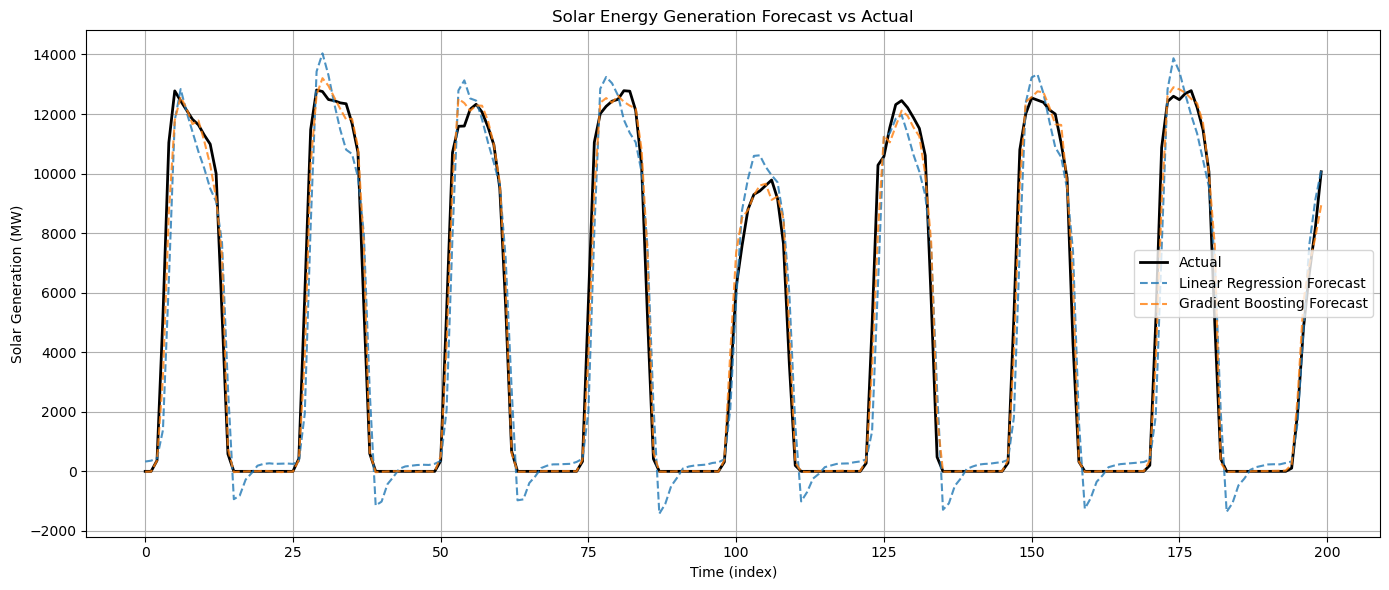

In [92]:
import matplotlib.pyplot as plt

# limit number of points for visual clarity (e.g., first 200 from test set)
n_points = 200

plt.figure(figsize=(14, 6))
plt.plot(y_test.values[:n_points], label='Actual', color='black', linewidth=2)
plt.plot(lr_preds[:n_points], label='Linear Regression Forecast', linestyle='--', alpha=0.8)
plt.plot(gb_preds[:n_points], label='Gradient Boosting Forecast', linestyle='--', alpha=0.8)

plt.title('Solar Energy Generation Forecast vs Actual')
plt.xlabel('Time (index)')
plt.ylabel('Solar Generation (MW)')
plt.legend()
plt.tight_layout()
plt.grid(True)

plt.savefig('images/energy_forecast_vs_actual.png', format='png', dpi=300)
plt.show()


##### Forecast

In [93]:
# forecast 24 hours ahead using gb_model
forecast_horizon = 24
predictions = []
timestamps = []

# start from the last known data row
last_row = sdf.iloc[-1].copy()
sdf_forecast = sdf.copy()

for step in range(1, forecast_horizon + 1):
    new_timestamp = last_row['timestamp'] + pd.Timedelta(hours=1)

    # construct new input row
    new_row = {
        'timestamp': new_timestamp,
        'hour': new_timestamp.hour,
        'dayofweek': new_timestamp.dayofweek,
        'month': new_timestamp.month,
        'lag_1': last_row['solar_system'],
        'lag_24': sdf_forecast['solar_system'].iloc[-24] if len(sdf_forecast) >= 24 else last_row['solar_system'],
        'rolling_mean_6': sdf_forecast['solar_system'].values[-6:].mean(),
        'rolling_std_6': sdf_forecast['solar_system'].values[-6:].std(),
        'temp_2m_south': last_row['temp_2m_south'],
        'temp_2m_north': last_row['temp_2m_north'],
        'temp_2m_east': last_row['temp_2m_east'],
        'temp_2m_west': last_row['temp_2m_west']
    }

    # model input and prediction
    X_input = pd.DataFrame([new_row])[[
        'hour', 'dayofweek', 'month',
        'lag_1', 'lag_24',
        'rolling_mean_6', 'rolling_std_6',
        'temp_2m_south', 'temp_2m_north', 'temp_2m_east', 'temp_2m_west'
    ]]
    y_pred = gb_model.predict(X_input)[0]

    # save forecast
    predictions.append(y_pred)
    timestamps.append(new_timestamp)

    # finalize and append new row
    new_row['solar_system'] = y_pred
    new_df_row = pd.DataFrame([new_row])
    sdf_forecast = pd.concat([sdf_forecast, new_df_row], ignore_index=True)

    # update for next step
    last_row = new_df_row.iloc[0]

# forecast result as a DataFrame
forecast_df = pd.DataFrame({
    'timestamp': timestamps,
    'predicted_solar': predictions
})


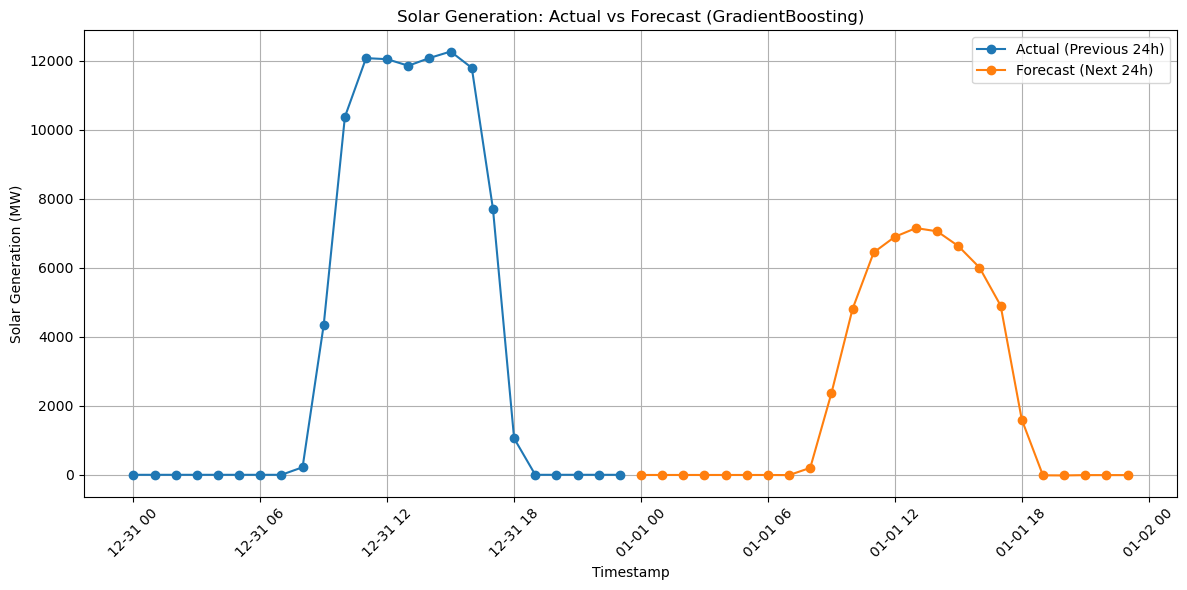

In [94]:
# get the last 24 hours of actual solar generation for comparison
actual_recent = sdf[['timestamp', 'solar_system']].iloc[-24:]

# plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(actual_recent['timestamp'], actual_recent['solar_system'], label='Actual (Previous 24h)', marker='o')
plt.plot(forecast_df['timestamp'], forecast_df['predicted_solar'], label='Forecast (Next 24h)', marker='o')

plt.title('Solar Generation: Actual vs Forecast (GradientBoosting)')
plt.xlabel('Timestamp')
plt.ylabel('Solar Generation (MW)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### **Take 2 Forecasting**

##### Feature Engineering

In [95]:
# reuse timestamp
sdf['hour'] = sdf['timestamp'].dt.hour
sdf['dayofweek'] = sdf['timestamp'].dt.dayofweek
sdf['month'] = sdf['timestamp'].dt.month

# additional lag features (up to one week)
lags = [1, 2, 3, 6, 12, 24, 48, 72, 96, 120, 144, 168]
for lag in lags:
    sdf[f'lag_{lag}'] = sdf['solar_system'].shift(lag)

# additional rolling statistics (based on previous hours)
sdf['rolling_mean_6'] = sdf['solar_system'].shift(1).rolling(window=6).mean()
sdf['rolling_std_6'] = sdf['solar_system'].shift(1).rolling(window=6).std()
sdf['rolling_mean_12'] = sdf['solar_system'].shift(1).rolling(window=12).mean()
sdf['rolling_std_12'] = sdf['solar_system'].shift(1).rolling(window=12).std()
sdf['rolling_min_12'] = sdf['solar_system'].shift(1).rolling(window=12).min()
sdf['rolling_max_12'] = sdf['solar_system'].shift(1).rolling(window=12).max()

# temp features
temp_cols = ['temp_2m_south', 'temp_2m_north', 'temp_2m_east', 'temp_2m_west']

# prop rows with missing values from lag/rolling operations
sdf.dropna(inplace=True)

# time features
time_features = ['hour', 'dayofweek', 'month']

# Lag features (matching the ones you generated)
lag_features = [f'lag_{lag}' for lag in [1, 2, 3, 6, 12, 24, 48, 72, 96, 120, 144, 168]]

# Rolling features
rolling_features = [
    'rolling_mean_6', 'rolling_std_6',
    'rolling_mean_12', 'rolling_std_12',
    'rolling_min_12', 'rolling_max_12'
]

# Temperature features
temp_features = ['temp_2m_south', 'temp_2m_north', 'temp_2m_east', 'temp_2m_west']

# Combine all features
features = time_features + lag_features + rolling_features + temp_features


##### Re-training Models

In [96]:
# define updated feature list
features = [
    'hour', 'dayofweek', 'month',                # time features
    'lag_1', 'lag_2', 'lag_24',                  # lag features
    'rolling_mean_6', 'rolling_std_6',           # short rolling
    'rolling_mean_12', 'rolling_std_12',         # medium rolling
    'temp_2m_south', 'temp_2m_north',
    'temp_2m_east', 'temp_2m_west'               # temperature features
]

# drop rows with NaNs introduced by shifting/rolling
sdf.dropna(subset=features + ['solar_system'], inplace=True)

# split data
X = sdf[features]
y = sdf['solar_system']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2, random_state=42)

# Train Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5)
gb_model.fit(X_train, y_train)

# Baseline LR model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# predict
gb_preds = gb_model.predict(X_test)
lr_preds = lr_model.predict(X_test)

# evaluate
print('Gradient Boosting Performance:')
print('MAE: ', mean_absolute_error(y_test, gb_preds))
print('RMSE:', mean_squared_error(y_test, gb_preds, squared=False))
print('R²:  ', r2_score(y_test, gb_preds))

print('\nLinear Regression Performance:')
print('MAE: ', mean_absolute_error(y_test, lr_preds))
print('RMSE:', mean_squared_error(y_test, lr_preds, squared=False))
print('R²:  ', r2_score(y_test, lr_preds))


Gradient Boosting Performance:
MAE:  334.1535575925992
RMSE: 687.5158062182608
R²:   0.976159629538963

Linear Regression Performance:
MAE:  702.3553610235508
RMSE: 1058.120580756512
R²:   0.9435299790850463


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Performance scores for both have increased.

##### Re-running Forecast Using Gradient Boosting + Extended Features

In [97]:
# setup forecast
forecast_horizon = 24
predictions = []
timestamps = []

# start from the last known row in sdf
last_row = sdf.iloc[-1].copy()
sdf_forecast = sdf.copy()

for step in range(1, forecast_horizon + 1):
    new_timestamp = last_row['timestamp'] + pd.Timedelta(hours=1)

    # create new input row
    new_row = {
        'timestamp': new_timestamp,
        'hour': new_timestamp.hour,
        'dayofweek': new_timestamp.dayofweek,
        'month': new_timestamp.month,
        'lag_1': last_row['solar_system'],
        'lag_2': last_row['lag_1'] if 'lag_1' in last_row else last_row['solar_system'],
        'lag_24': sdf_forecast['solar_system'].iloc[-24] if len(sdf_forecast) >= 24 else last_row['solar_system'],
    }

    # get rolling values using last 12 known values
    recent_vals = sdf_forecast['solar_system'].values[-12:]
    new_row['rolling_mean_6'] = np.mean(recent_vals[-6:])
    new_row['rolling_std_6'] = np.std(recent_vals[-6:])
    new_row['rolling_mean_12'] = np.mean(recent_vals)
    new_row['rolling_std_12'] = np.std(recent_vals)

    # copy latest temperature values from last_row
    for temp_col in ['temp_2m_south', 'temp_2m_north', 'temp_2m_east', 'temp_2m_west']:
        new_row[temp_col] = last_row[temp_col]

    # create input DataFrame for prediction
    X_input = pd.DataFrame([new_row])[features]
    y_pred = gb_model.predict(X_input)[0]

    # append results
    predictions.append(y_pred)
    timestamps.append(new_timestamp)

    # finalize and append row
    new_row['solar_system'] = y_pred
    last_row = pd.Series(new_row)
    sdf_forecast = pd.concat([sdf_forecast, pd.DataFrame([last_row])], ignore_index=True)

# final forecast DataFrame
forecast_df = pd.DataFrame({
    'timestamp': timestamps,
    'predicted_solar': predictions
})


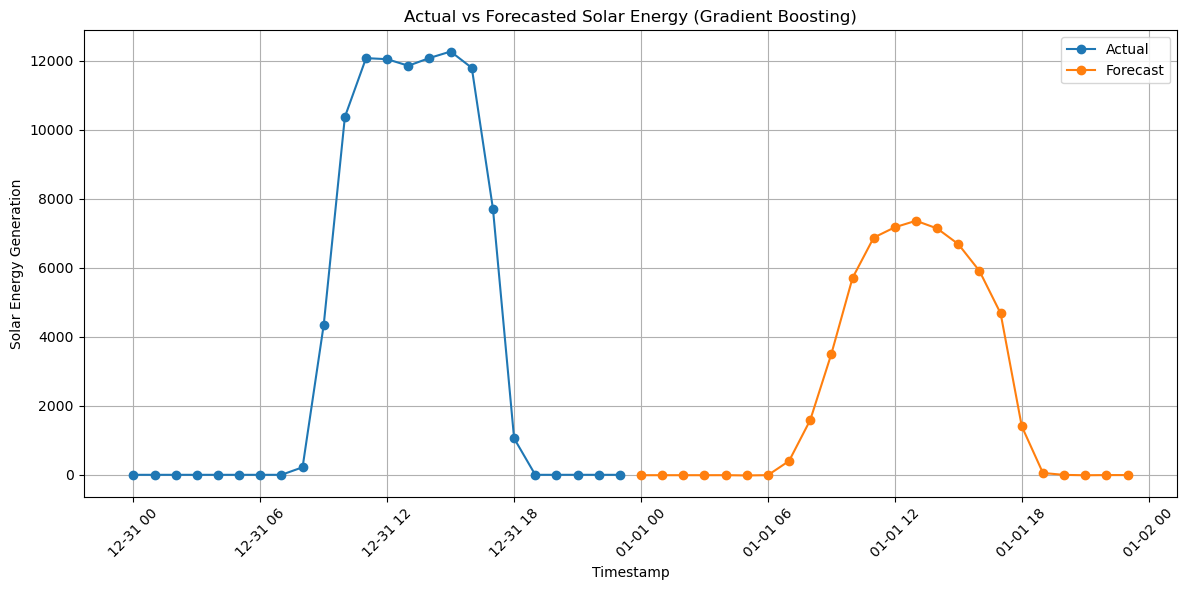

In [98]:
# get last 24 actual timestamps and values
actual_recent = sdf[['timestamp', 'solar_system']].tail(24)

# forecasted values are already in forecast_df
plt.figure(figsize=(12, 6))

# plot actual vs. predicted values
plt.plot(actual_recent['timestamp'], actual_recent['solar_system'], label='Actual', marker='o')
plt.plot(forecast_df['timestamp'], forecast_df['predicted_solar'], label='Forecast', marker='o')


plt.xlabel('Timestamp')
plt.ylabel('Solar Energy Generation')
plt.title('Actual vs Forecasted Solar Energy (Gradient Boosting)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



More features does not equal better predictions. Still far from accurate in shape and size. Recursive forecasting compounds erros, and here ir struggles to capture the full shape of the target, I will try direct forecasting to see if I can produce a better result. Direct forecasting can help mitigate cumulative error and may improve short-horizon accuracy.

### **Direct Forecasting**

##### Feature Engineering

In [99]:
# get time features
sdf['hour'] = sdf['timestamp'].dt.hour
sdf['dayofweek'] = sdf['timestamp'].dt.dayofweek
sdf['month'] = sdf['timestamp'].dt.month

# get lag features
sdf['lag_1'] = sdf['solar_system'].shift(1)
sdf['lag_24'] = sdf['solar_system'].shift(24)

# get rolling features
sdf['rolling_mean_6'] = sdf['solar_system'].shift(1).rolling(window=6).mean()
sdf['rolling_std_6'] = sdf['solar_system'].shift(1).rolling(window=6).std()
sdf['rolling_mean_24'] = sdf['solar_system'].shift(1).rolling(window=24).mean()
sdf['rolling_std_24'] = sdf['solar_system'].shift(1).rolling(window=24).std()

# make future target columns (+1 to +24)
for i in range(1, 25):
    sdf[f'solar_system+{i}'] = sdf['solar_system'].shift(-i)

# drop rows with missing values
sdf.dropna(inplace=True)

# define input features
feature_cols = [
    'hour', 'dayofweek', 'month',
    'lag_1', 'lag_24',
    'rolling_mean_6', 'rolling_std_6',
    'rolling_mean_24', 'rolling_std_24',
    'temp_2m_south', 'temp_2m_north', 'temp_2m_east', 'temp_2m_west'
]

# store solar_system+1 to solar_system+24 as target columns
target_cols = [f'solar_system+{i}' for i in range(1, 25)]

In [100]:
from sklearn.multioutput import MultiOutputRegressor

X = sdf[feature_cols]  # feature_cols already defined with lags, rolling, temp, etc.
y = sdf[target_cols]

# train-test split
X_train, X_test, y_train, y_test_multi = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# Initialize models
lr_base = LinearRegression()
gb_base = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5)

# Wrap in multioutput
lr_model = MultiOutputRegressor(lr_base)
gb_model = MultiOutputRegressor(gb_base)

# Train
lr_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor(max_depth=5,
                                                         n_estimators=200))

In [101]:
# predict
lr_preds_multi = lr_model.predict(X_test)
gb_preds_multi = gb_model.predict(X_test)

# evaluation function
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    print(f'{name} Performance:')
    print(f'MAE :  {mae:.2f}')
    print(f'RMSE:  {rmse:.2f}')
    print(f'R²   :  {r2:.4f}')
    print('-' * 30)

# evaluate
evaluate_model('Linear Regression', y_test_multi, lr_preds_multi)
evaluate_model('Gradient Boosting', y_test_multi, gb_preds_multi)

Linear Regression Performance:
MAE :  1988.06
RMSE:  2607.85
R²   :  0.6429
------------------------------
Gradient Boosting Performance:
MAE :  1282.23
RMSE:  2099.94
R²   :  0.7738
------------------------------


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


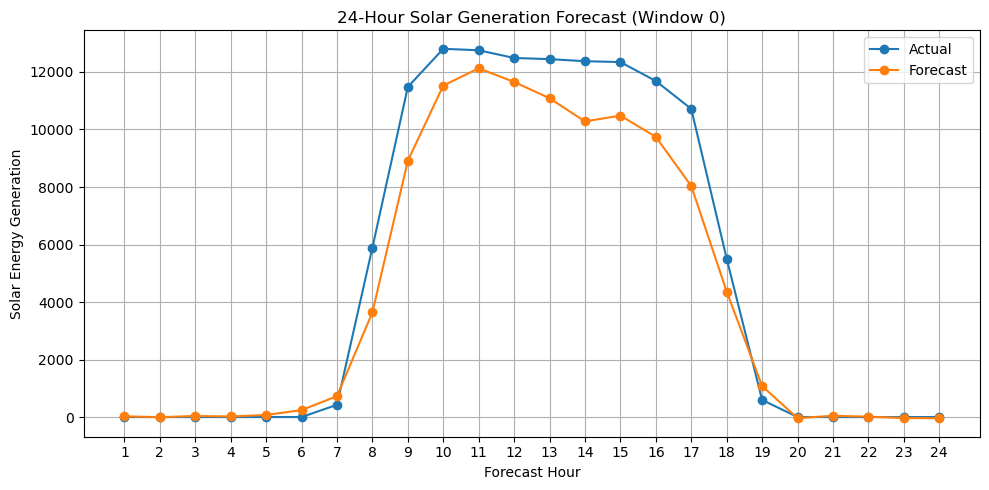

In [108]:
forecast_index = 0  # visualizing first window
predicted = gb_preds_multi[forecast_index]
actual = y_test_multi.iloc[forecast_index].values
hours = range(1, 25)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(hours, actual, label='Actual', marker='o')
plt.plot(hours, predicted, label='Forecast', marker='o')
plt.title(f'24-Hour Solar Generation Forecast (Window {forecast_index})')
plt.xlabel('Forecast Hour')
plt.ylabel('Solar Energy Generation')
plt.xticks(hours)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.savefig('images/solar_forecast_window1.png', format='png', dpi=300)
plt.show()

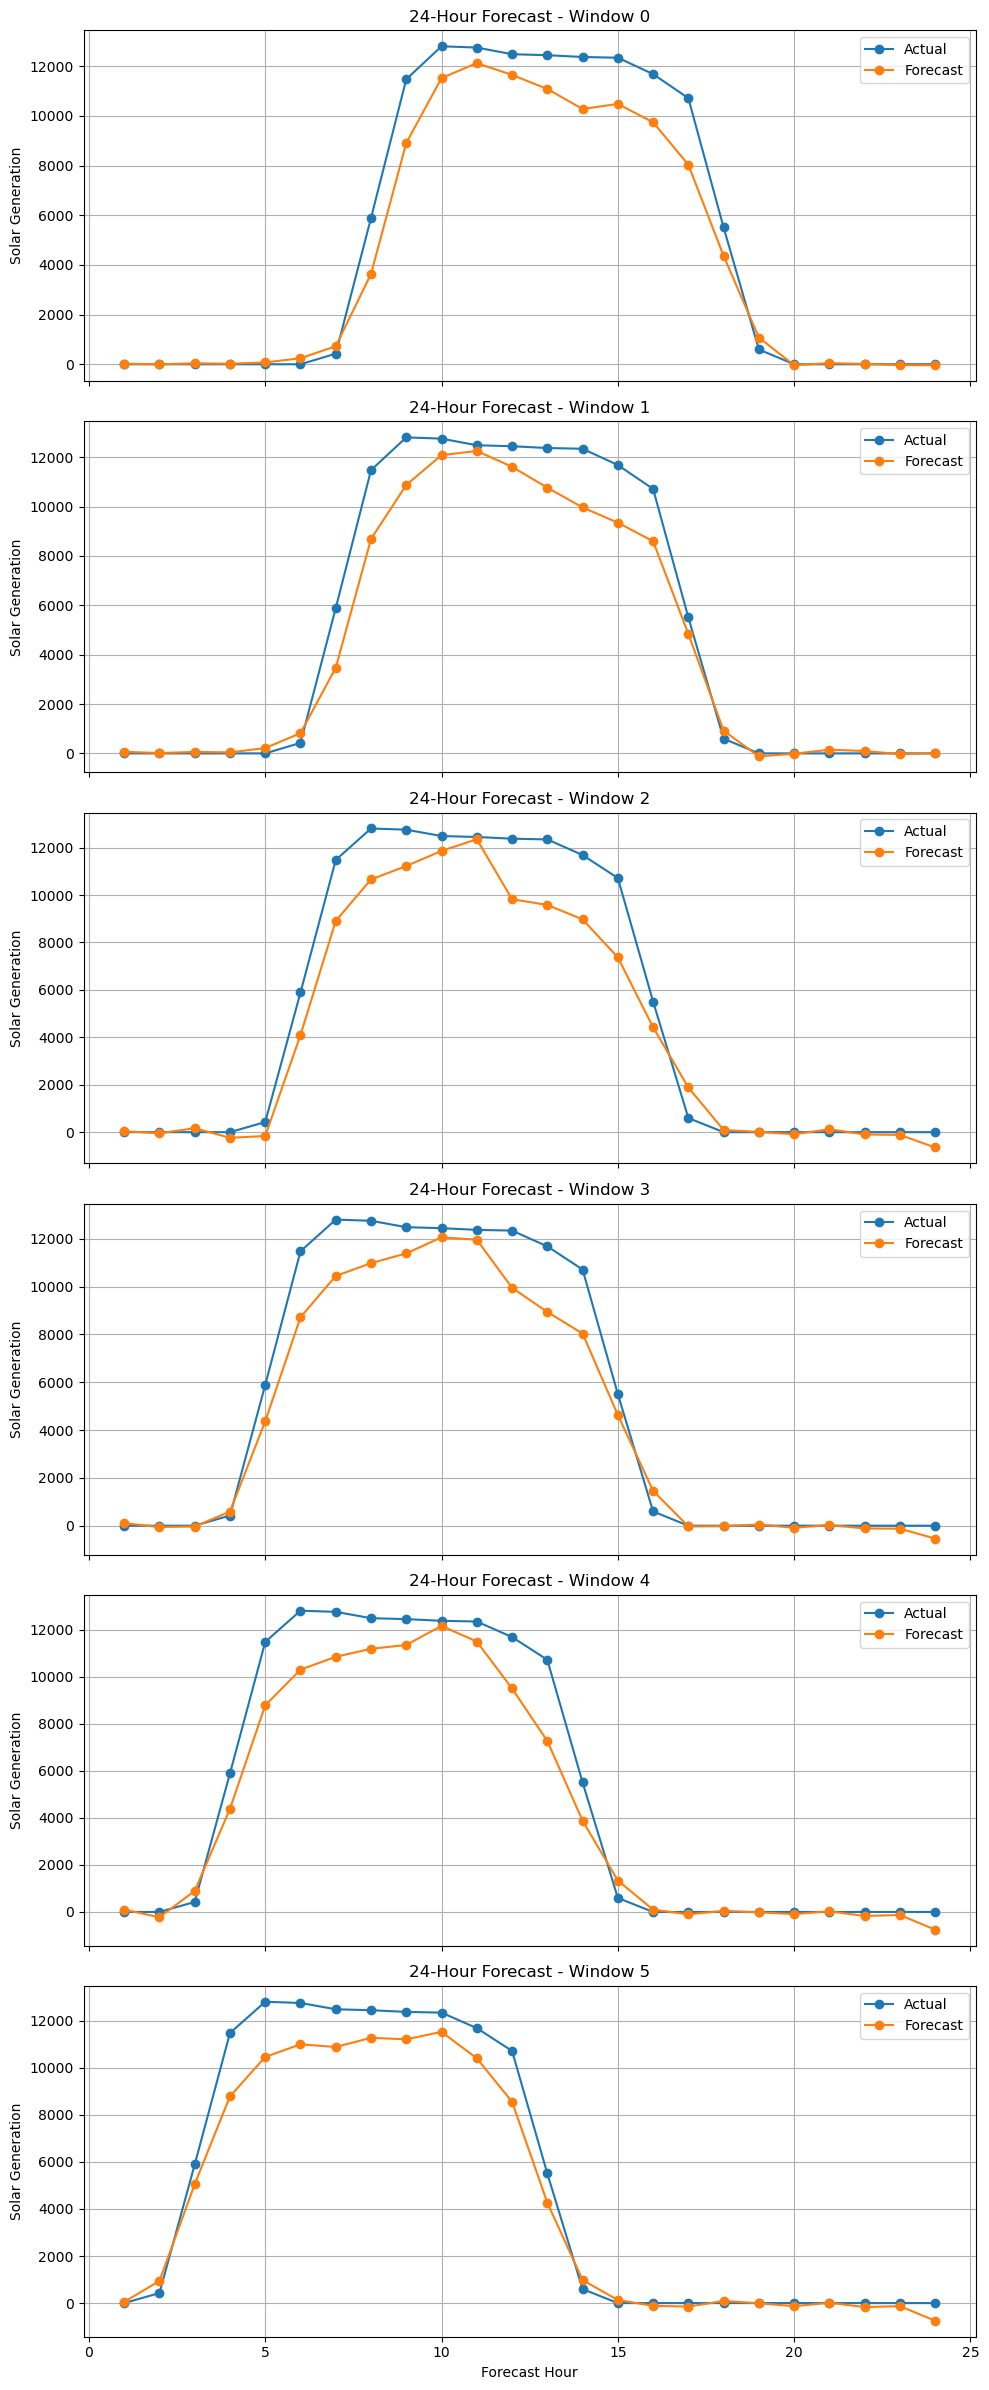

In [109]:
# mulitple panels to show different forecast windows
num_panels = 6
fig, axes = plt.subplots(num_panels, 1, figsize=(10, 4 * num_panels), sharex=True)

for i in range(num_panels):
    ax = axes[i]
    predicted = gb_preds_multi[i]
    actual = y_test_multi.iloc[i].values
    hours = range(1, 25)

    ax.plot(hours, actual, label='Actual', marker='o')
    ax.plot(hours, predicted, label='Forecast', marker='o')
    ax.set_title(f'24-Hour Forecast - Window {i}')
    ax.set_ylabel('Solar Generation')
    ax.grid(True)
    ax.legend()

axes[-1].set_xlabel('Forecast Hour')
plt.tight_layout()
plt.savefig('images/solar_forecast_multi_window.png', format='png', dpi=300)
plt.show()

To ensure stability of the model's performance across time, I used TimeSeriesSplit cross-validation to validate my forecasting model on multiple sequential folds.

#### Cross-Validation with Time-Series Split

In [104]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

tscv = TimeSeriesSplit(n_splits=5) # 5 splits so that each test fold represents at least a full 24 hour cycle

In [106]:
# wrap the GB regressor
wrapped_gb_model = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5))

# run cross_val_score
scores = cross_val_score(wrapped_gb_model, X, y, cv=tscv, scoring='neg_mean_absolute_error')
mae_scores = -scores

# flip sign to make it positive MAE
mae_scores = -scores
print('MAE per fold:', mae_scores)
print('Average MAE:', mae_scores.mean())

MAE per fold: [1071.63103305 1218.64081521 1641.29072966  946.74156124 1373.19544931]
Average MAE: 1250.2999176964688


In [107]:
# use R² score
r2_scores = cross_val_score(wrapped_gb_model, X, y, cv=tscv, scoring='r2')

print('R² per fold:', r2_scores)
print('Average R²:', r2_scores.mean())

R² per fold: [0.66066732 0.66879044 0.67840466 0.93255753 0.73203628]
Average R²: 0.7344912444323997
